# Import Libraries

In [68]:
'''Import libraries'''
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, roc_curve, precision_recall_curve, fbeta_score, f1_score
from collections import Counter

# Importing Data

In [69]:
data = pd.read_csv("creditcard.csv")
data.head()
try:
    data = pd.read_csv("creditcard.csv")
    print(("Credit Card dataset has {} samples with {} features each.").format(*data.shape))
except:
    print( "Dataset could not be loaded. Is the dataset missing?")

Credit Card dataset has 284807 samples with 31 features each.


# Data Exploration

Total records count  284807
Fraud records count  492
Non Fraud records count  284315


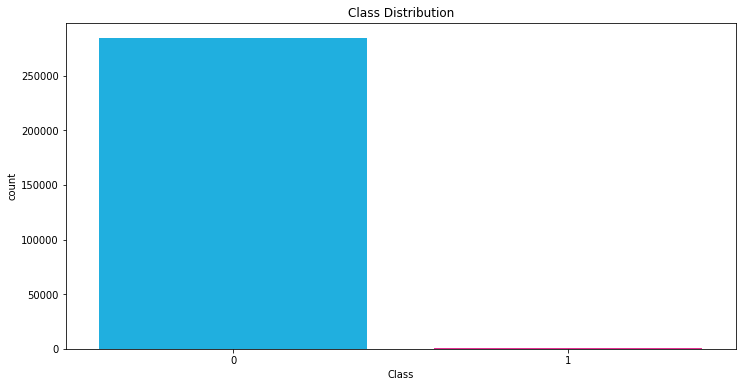

In [70]:
total_count = data.Class.count()
frauds_count = data.Class[data.Class == 1].count()
non_fraud_counts = data.Class[data.Class == 0].count()

print("Total records count  {}".format(total_count))
print("Fraud records count  {}".format(frauds_count))
print("Non Fraud records count  {}".format(non_fraud_counts))

#Graph
my_palette = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
sns.countplot(x = 'Class', data = data, palette = my_palette)
plt.title('Class Distribution')
plt.show()

# Separate features and labels

In [71]:
features  = data.drop(["Class"],axis=1)
label = data.Class

# Split into Train, Test & Validation datasets (for Neural Nets)

In [72]:
def get_train_test_val(features_final, label2, test_size=0.3):
    print("\nSplitting data into Train,Test & Validation...")
    X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    label2,
                                                    test_size = test_size,
                                                    random_state=0)
#     X_val = None
    X_train, X_val, y_train, y_val   = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.2,
                                                    random_state=0)
    return(X_train, X_test ,X_val, y_train, y_test,  y_val)

def print_summary(X_train, X_test, X_val, features,test_size):
    print("\nDisplay Split Dataset Summary...")
    print("Split percent for test set {}".format(round(test_size, 2)))
    print("Orignal set has {} samples'".format(features.shape[0]))
    print('Training set has {} samples'.format(X_train.shape[0]))
    print('Validation set has {} samples'.format(X_val.shape[0]))
    print('Testing set has {} samples'.format(X_test.shape[0]))

test_size = 0.2
X_train, X_test ,X_val, y_train, y_test,  y_val = get_train_test_val(features, label, test_size)

#Print summary of datasets
print_summary(X_train, X_test, X_val, features,test_size)


Splitting data into Train,Test & Validation...

Display Split Dataset Summary...
Split percent for test set 0.2
Orignal set has 284807 samples'
Training set has 182276 samples
Validation set has 45569 samples
Testing set has 56962 samples


# Split into train and test data

In [73]:
def get_train_test_data(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
    return(X_train,X_test,y_train,y_test)

X_train, X_test , y_train, y_test =get_train_test_data(features,label)

print("\nDisplay Split Dataset Summary...")
print("Orignal set has {} samples'".format(features.shape[0]))
print('Training set has {} samples'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))


Display Split Dataset Summary...
Orignal set has 284807 samples'
Training set has 199364 samples
Testing set has 85443 samples


# Benchmark/Naive Model - Logistic Classifier (Exp -1)

In [74]:
# Create a simple classifier
clf = LogisticRegression(random_state=10)

# Training
clf.fit(X_train, y_train) 

# Get Predictions/Scores
# y_pred = clf.decision_function(X_test)
y_pred = clf.predict(X_test)

# Calculate Peformance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# # Get Predictions/Scores
y_pred = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_pred)

print('Precision score: {0:0.2f}'.format(
      precision))
print('Recall score: {0:0.2f}'.format(
      recall))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Precision score: 0.77
Recall score: 0.63
Average precision-recall score: 0.59


Text(0.5,1,'2-class Precision-Recall curve: AP=0.59')

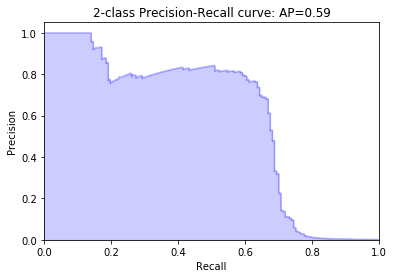

In [75]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))